In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt

In [2]:
file_path = '/Users/e4/E-2/DEAP_DATA/s01.dat'
data = np.fromfile(file_path, dtype=np.float32)

n_channels = 40       
n_time_points = 8064  
n_trials = len(data) // (n_channels * n_time_points)
data = data[:n_trials * n_channels * n_time_points].reshape(n_trials, n_channels, n_time_points)
subset = data[:10]  

In [3]:
if np.isnan(subset).any() or np.isinf(subset).any(): 
    subset = np.nan_to_num(subset)
    print("NaNs or Infs found and replaced.")
else:
    print("No NaNs or Infs found.")

NaNs or Infs found and replaced.


In [4]:
subset_flattened = subset.reshape(n_channels, 10 * n_time_points)
info = mne.create_info(ch_names=[f'EEG {i+1}' for i in range(n_channels)], sfreq=128, ch_types='eeg')
raw = mne.io.RawArray(subset_flattened, info)

Creating RawArray with float64 data, n_channels=40, n_times=80640
    Range : 0 ... 80639 =      0.000 ...   629.992 secs
Ready.


In [5]:
events = np.array([[i * n_time_points, 0, 1] for i in range(10)])
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=10, baseline=None, detrend=1)

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


In [6]:
standard_1020_names = [
    'Fp1', 'Fp2', 'F7', 'F8', 'F3', 'F4', 'Fz', 'T7', 'Cz', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2',
    'AF7', 'AF3', 'AF4', 'AF8', 'FC5', 'FC1', 'FC2', 'FC6', 'CP5', 'CP1', 'CP2', 'CP6', 'PO7', 'PO3', 'POz', 
    'PO4', 'PO8', 'FT7', 'FT8', 'TP7', 'TP8', 'Oz', 'Fpz'
]

In [7]:
mapping = {f'EEG {i+1}': standard_1020_names[i] for i in range(n_channels)}
try:
    raw.rename_channels(mapping)
except ValueError as e:
    print("Error in renaming channels:", e)
    print("Available channels:", raw.info['ch_names'])

In [8]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawArray | 40 x 80640 (630.0 s), ~24.7 MB, data loaded>

In [9]:
events = np.array([[i * n_time_points, 0, 1] for i in range(10)])
epochs = mne.Epochs(raw, events, event_id=1, tmin=0, tmax=10, baseline=None, detrend=1)

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


In [10]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(epochs)

Fitting ICA to data using 40 channels (please be patient, this may take a while)
Using data from preloaded Raw for 10 events and 1281 original time points ...
0 bad epochs dropped
Selecting by number: 20 components
Using data from preloaded Raw for 10 events and 1281 original time points ...


/var/folders/sx/5hg33bqj785_0chtp8jbtxbw0000gn/T/ipykernel_14009/1888087212.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs)


Fitting ICA took 0.2s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,35 iterations on epochs (12810 samples)
ICA components,20
Available PCA components,40
Channel types,eeg
ICA components marked for exclusion,—


Fitting ICA to data using 40 channels (please be patient, this may take a while)
Selecting by number: 20 components


/var/folders/sx/5hg33bqj785_0chtp8jbtxbw0000gn/T/ipykernel_14009/4083730307.py:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Fitting ICA took 0.6s.


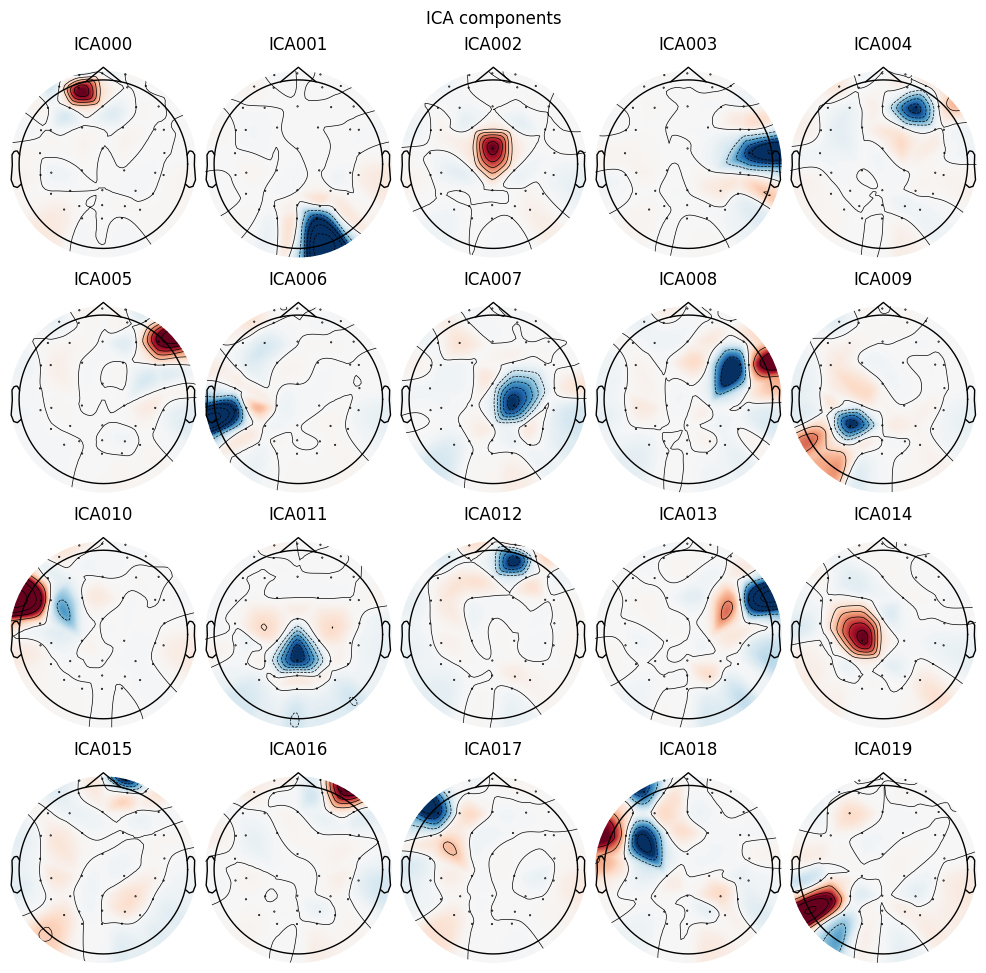

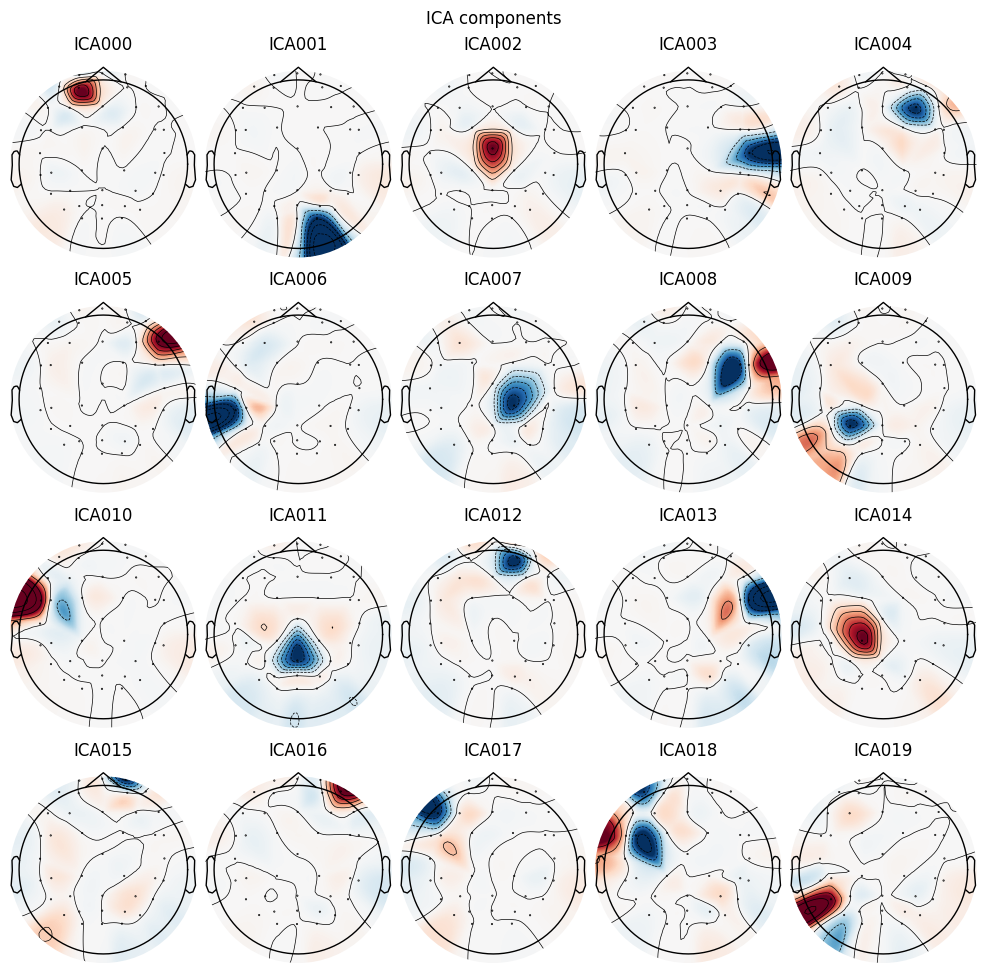

In [11]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(raw)
ica.plot_components()